# Using CLASS
CLASS is a boltzmann code, which is the terminlogy used to describe a class of programs that solve the Boltzmann Equations that give us the "initial conditions" for large scale structure based on assumptions about inflation, reionizations, recombination, and other "early" events. The other major code out there that does this is CAMB. The main difference between the two is that CAMB is implemetned in Fortran and CLASS is implemented in C++ and (IMO) has better documentation.

CLASS also has a Python wrapper that interfaces with the C++ code in such a way that it can give detailed error messages if you try to use the code in a stupid way. This is helpful, because using boltzmann codes can be clunky sometimes.

In this notebook I'll show you how to do something very simple: call CLASS to compute the linear and nonlinear power spectra ($P(k,z)$ and $P_{mm}(k,z)$). It also supports all the regular stuff one would expect of a cosmology code, like computing distances. I have yet to see a comparison of CLASS to astropy for these purposes. CLASS has been compared to CAMB and they agree at the ~0.1% level (or something like that).

**NOTE**: the full documentation for CLASS is in the explanatory.ini file found in the top-level of the CLASS repository. The important things for our purposes is that it contains: what cosmological parameters we can pass in, which parts of the CLASS code we run when we call the compute() function.

In [1]:
#Import relevane modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from classy import Class

As it turns out, CLASS is a word that is used a lot in object oriented programming. Because of this, they named the Python wrapper classy. The important class that we want from classy is called "Class" (with a capital C). Yea, confusing.

In [2]:
#Define our cosmology
#The possible parameters we can pass in are extensive, so I'll just use some basic ones here.
Omega_b = 0.05 #NOTE: use Omega, not omega, since they mean different things
Omega_m = 0.3
Omega_cdm = Omega_m - Omega_b
h = 0.7 #This is H0/100
A_s = 2.1e-9 #Power spectrum amplitude
n_s = 0.96 #Power spectrum index

CLASS needs the cosmology passed in as a dictionary. In this same dictionary, we also define what the primary output is. For this, we write mPk. This means we want the matter power spectrum. In addition, if we want the non-linear power spectrum, we say that as well. Note that we specify that we want to use the halofit (Takahashi+Smith) version. I don't believe any other non-linear versions are implemented anyway.

Finally, we must specify the max $k$ value that we want $P$ evaluated up to in units of $h/Mpc$, as well as the maximum redshift that we will evaluate $P(k,z)$ up to. This is because CLASS calculates everything in a fine grid and then creates look-up tables (splines) for nearly instantaneous computation in the future.

In [3]:
params = {
    'output': 'mPk',
    'non linear':'halofit',
    'h':h,
    'A_s':A_s,
    'n_s':n_s,
    'Omega_b':Omega_b,
    'Omega_cdm':Omega_cdm,
    'P_k_max_h/Mpc':1000.,
    'z_max_pk':1.0
    }

Now, create a new Class "cosmology", set the cosmology, and call compute().

In [4]:
cosmo = Class()
cosmo.set(params)
cosmo.compute()

At this point, the look-up tables are created. We can compute power spectra very quickly now.

**NOTE**: Class takes as an *input* $k$ in units of $1/Mpc$, and gives as output $P$ in units of $Mpc^3$. This is *different* then the default behavior of CAMB found in Cosmosis, which has $h$ on everything.

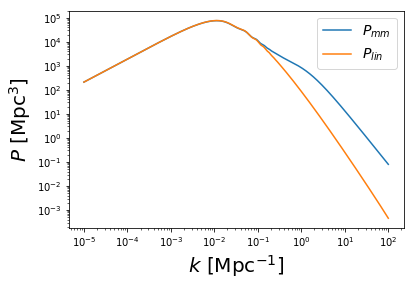

In [5]:
k = np.logspace(-5, 2, base=10, num=1000) #Mpc^-1
z = 0.0
#pk() and pk_lin() are for one point in k,z at a time, so here I've used Python array comprehension
Pmm  = np.array([cosmo.pk(ki, z) for ki in k]) 
Plin = np.array([cosmo.pk_lin(ki, z) for ki in k])
plt.loglog(k, Pmm, label=r"$P_{mm}$")
plt.loglog(k, Plin, label=r"$P_{lin}$")
plt.xlabel(r"$k\ [{\rm Mpc}^{-1}]$", fontsize=20)
plt.ylabel(r"$P\ [{\rm Mpc^3}]$", fontsize=20)
plt.legend(fontsize=14)